# Andrew Spicciati
## Phys 434 Lab 2
### 10/16/21

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal

## Problem 1

I chose an average cosmic-ray background of 2 per day, and average gamma-rays from my hypothetical source to be 8 per day.

### A)

In [2]:
CR_Background = 2
gamma_rays = 8

In [3]:
def convolve(dist,n=2,mode='full'):
    if n == 1:
        return dist
    convolution = signal.convolve(dist,dist,mode=mode)
    for a in range(n-2):
        convolution = signal.convolve(convolution,dist,mode=mode)
    return convolution

In [4]:
def poisson_plots(avg=False):
    k = np.linspace(0,20,21)
    poisson = stats.poisson.pmf(k,mu=CR_Background)
    num_days = [1,2,5,10]

    plt.rcParams["figure.figsize"] = (25,7)
    fig, ax = plt.subplots(1, 2)
    plt.tick_params(labelsize = 10)

    ax[0].set_title('Summed Poisson Probability Distributions of Cosmic-Ray Background, $\lambda$ = 2')
    ax[0].set_xlim(0,45)
    if avg:
        ax[0].set_title('Summed+Averaged Poisson Probability Distributions')
        ax[0].set_xlim(0,8)
        

    ax[1].set_yscale('log')
    ax[1].set_title('Log Plot of Probability Distributions')

    for idx,val in enumerate(num_days):
        k = np.linspace(0,20*val,20*val+1)
        if avg:
            k = k/(val)
        ax[0].step(k,convolve(poisson,n=val),where='mid',linewidth=4,label=f'{val}')
        ax[1].plot(k,convolve(poisson,n=val),linewidth=3,label=f'{val}')


    for i in range(2):
        ax[i].set_xlabel('Num Events (k)')
        ax[i].set_ylabel('Probability')
        ax[i].legend(title = 'Num Days',fontsize='large')

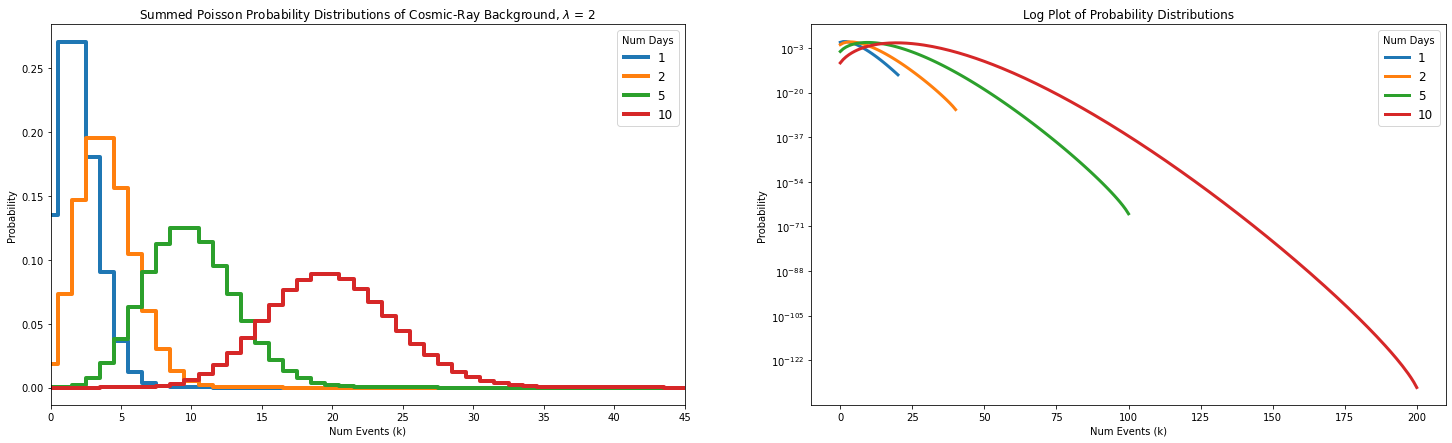

In [5]:
poisson_plots()

### B)

Here I show that the distribution shifts to the right and becomes wider the more days it is run for.

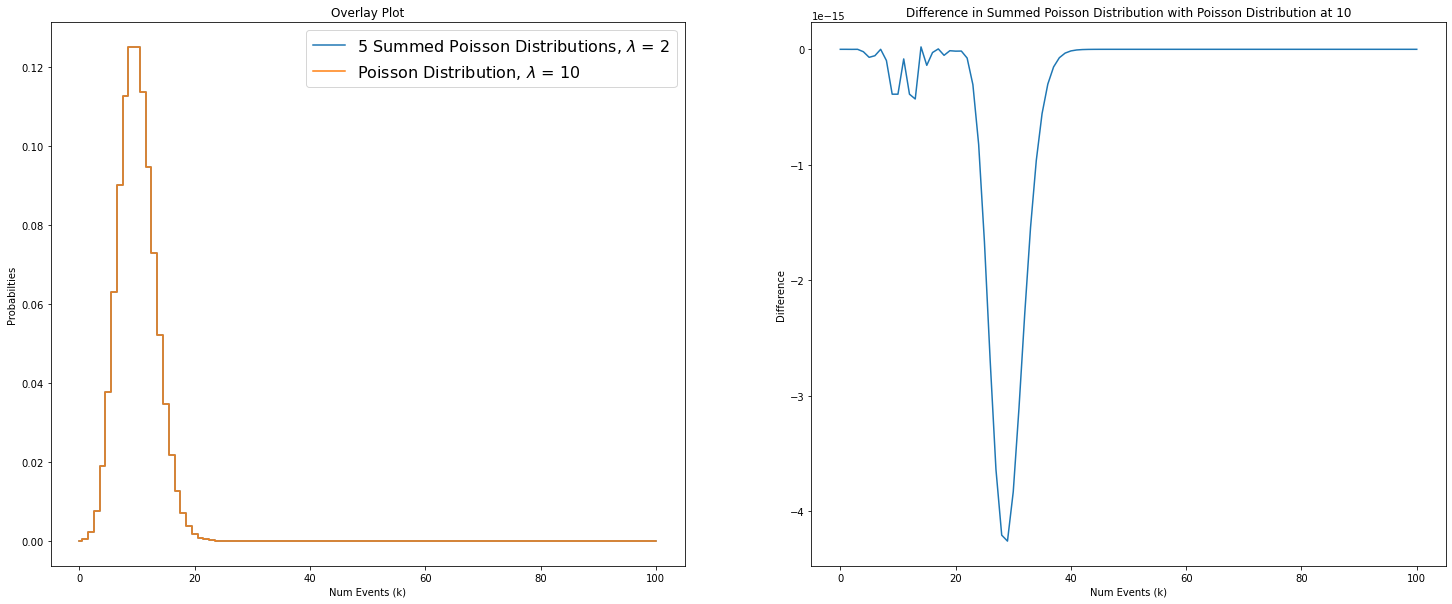

In [6]:
k = np.linspace(0,20,21)
poisson = stats.poisson.pmf(k,mu=CR_Background)

summed_poisson = convolve(poisson,n=5)

x = np.linspace(0,100,101)
poisson_true = stats.poisson.pmf(x,mu=10)

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 2)
plt.tick_params(labelsize = 10)

ax[0].step(x,summed_poisson, where='mid',label = '5 Summed Poisson Distributions, $\lambda$ = 2')
ax[0].step(x,poisson_true, where='mid',label = 'Poisson Distribution, $\lambda$ = 10')

ax[1].plot(x,summed_poisson-poisson_true)

ax[0].set_xlabel('Num Events (k)')
ax[0].set_ylabel('Probabilties')
ax[0].set_title('Overlay Plot')
ax[1].set_xlabel('Num Events (k)')
ax[1].set_ylabel('Difference')
ax[1].set_title('Difference in Summed Poisson Distribution with Poisson Distribution at 10')

ax[0].legend(fontsize = 16);

Here I show that after 5 days, the summed probability distribution is equivalent to a poisson distribution centered at 5x the expected value per night. The second plot shows that the difference in the two lines is nearly 0 (to a factor of 10^-15) for all values k. This makes sense conceptually, because the results of one night have no impact on the results of the next.

### C)


When you average the summed probability distributions, the resulting distribution instead shifts to be closer to the expected value of k, and narrower as you increase the number of days. This is because as you take data over more days, the liklihood of getting outlier values over and over becomes increasingly low.



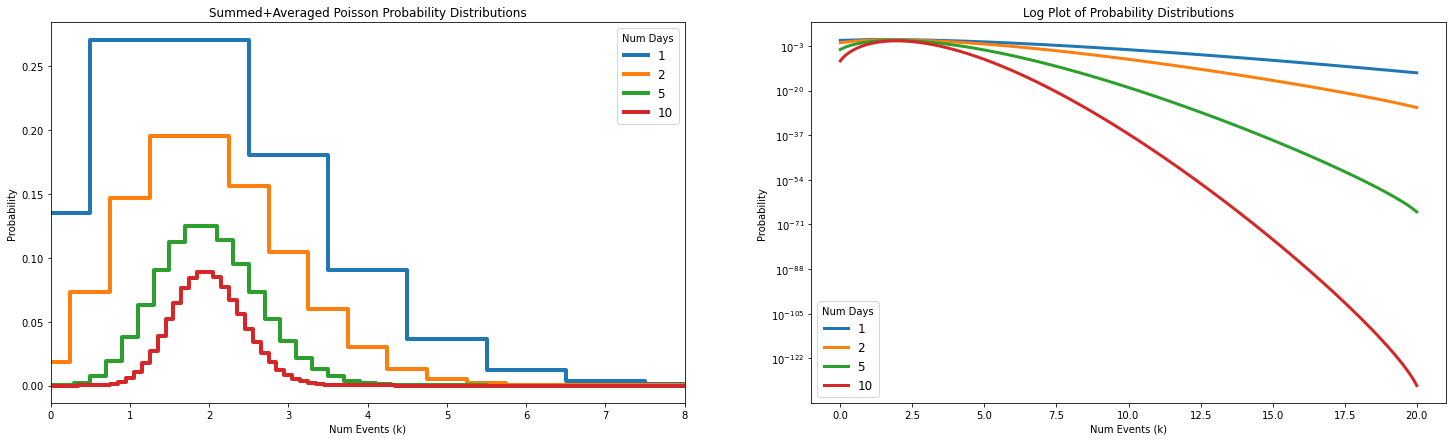

In [7]:
poisson_plots(avg=True)

### D)
Choosing 5 as my number of days, I would see 40 gamma rays.

In [8]:
k = np.linspace(0,20,21)
poisson = stats.poisson.pmf(k,mu=CR_Background)

dist = convolve(poisson,n=5)
probability = sum(dist[40:])
print(probability)

7.341405446132749e-13


In [9]:
stats.norm.ppf(1-probability)

7.077443434036951

So I see that this cooresponds to a likelihood of ~7 sigmal; very significant.

## Problem 2

### A)

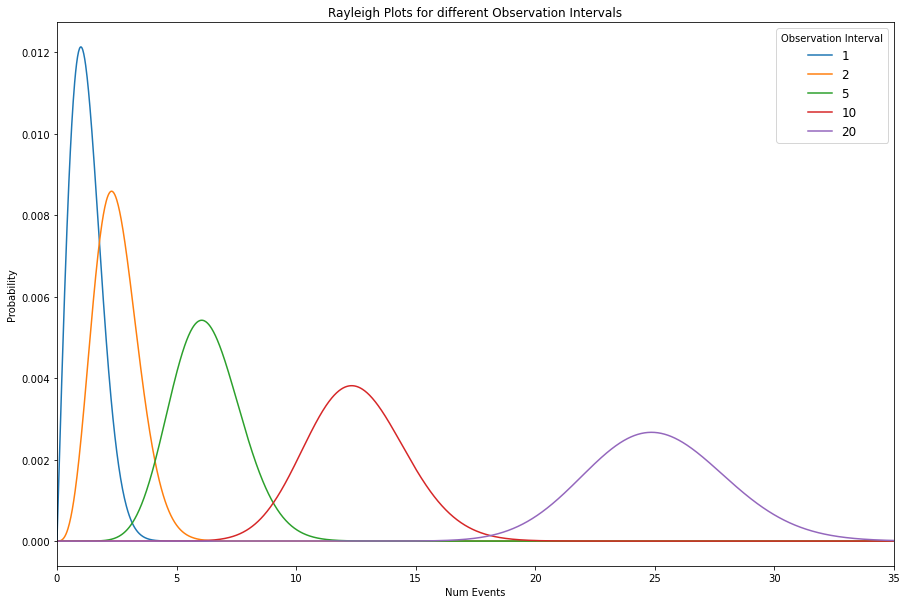

In [10]:
xmax = 20
bins = 1000

x = np.linspace(0,xmax,bins)
poisson = stats.rayleigh.pdf(x,loc=0,scale=1)/(bins/xmax)
obs_interval = [1,2,5,10,20]

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 10)

plt.xlim(0,35)
plt.xlabel('Num Events')
plt.ylabel('Probability')    
plt.title('Rayleigh Plots for different Observation Intervals')

for idx, val in enumerate(obs_interval):
    plt.plot(np.linspace(0,val*xmax,val*bins - (val-1)), convolve(poisson,n=val), label = val)


plt.legend(title = 'Observation Interval',fontsize='large');

### B)
For the Rayleigh distribution, as you average over longer intervals, the mean shifts higher, and the distribution widens. It does appear to approach gaussian, somewhere around 15 or 20.

## Problem 3

### Version 1:

#### A)

I assume my Gaussian has a standard deviation of 3.3, and I measure a signal strength of 19.24.

First I calculate the cdf up to my signal measurement:

In [11]:
cdf = stats.norm.cdf(19.24,loc=0,scale=3.3)
cdf

0.9999999972336594

then I convert this into a sigma value and see that the sigma value of 5.8 is significant enough to claim a discovery:



In [12]:
stats.norm.ppf(cdf)

5.830303026988079

### Version 2:

#### B)
Statistical Question: What is the chance of making this 5.8 sigma measurement if I were measuring from an area of 10k pixels?

To calculate this, I multiply my distribution by 10,000 and integrate from my signal of 19.24 to infinity.

In [13]:
x = np.linspace(-100,100,10000)
bg = stats.norm.pdf(x,loc=0,scale=3.3)/50

In [14]:
#showing that my distribution is normalized
sum((bg))

0.9999000000000001

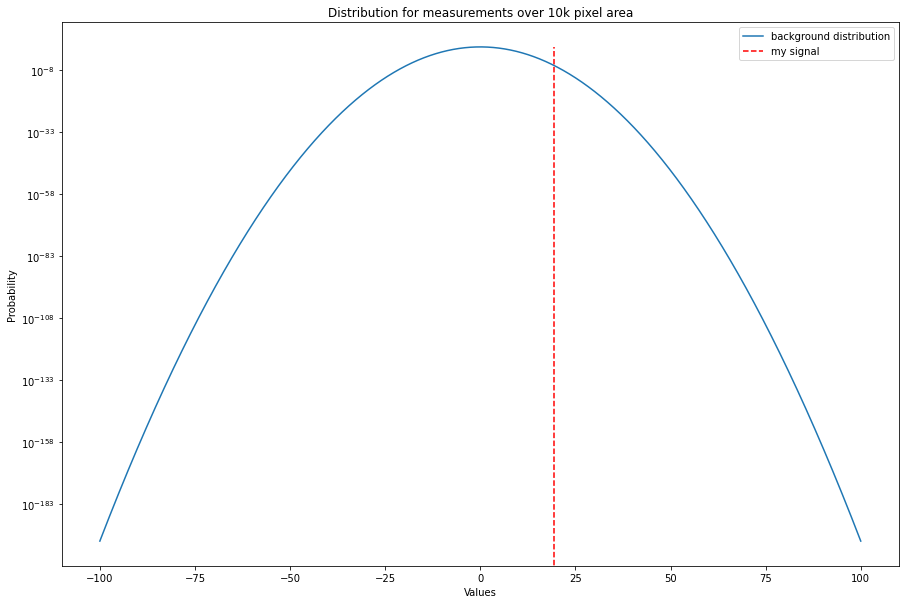

In [15]:
plt.plot(x,bg*10000,label='background distribution')
plt.vlines(19.24,0,max(bg*10000),linestyles='dashed',colors='r',label='my signal')
plt.yscale('log')
plt.legend()

plt.title('Distribution for measurements over 10k pixel area')
plt.xlabel('Values')
plt.ylabel('Probability'); 

### C)
Integrating to the right of 19.24 in my 10k pixel distribution is mathematically the same as integrating to the right of 19.24 on the original distribution and multiplying it by 10,000. Here I have done both to show this:

In [16]:
#finding closest array value to our measured value 19.24
np.argwhere(np.where(x>19.23,x,np.inf)<19.26)

array([[5961],
       [5962]])

In [17]:
#they are evenly spaced, so by choosing the lower value, I get an overestimate
sum((bg*10000)[5961:])

2.8581869604838974e-05

In [18]:
prob = stats.norm.sf(19.24,loc=0,scale=3.3)* 10000
prob

2.7663405460775942e-05

In [19]:
stats.norm.ppf(1-prob)

4.031903903270318

So for my 10k pixel distribution, this is now only a 4 sigma measurement, meaning it is no longer statistically significant.

## Problem 4
### A)

In [20]:
five_sigma_orig = stats.norm.ppf(stats.norm.cdf(5),loc=0,scale=3.3)
five_sigma_orig

16.49999999990158

### B)
I can't think of a function that will integrate the 10k distribution for me, so I will use a while loop to do so

In [21]:
x = np.linspace(-100,100,10000)
bg = stats.norm.pdf(x,loc=0,scale=3.3)/50
bg = bg*10000

prob = 0
idx = 0
while prob < stats.norm.sf(5):
    idx +=1
    prob += bg[-idx]
idx = 9999 - idx

In [22]:
five_sigma_new = x[idx]
five_sigma_new

21.592159215921598

### C)

In [23]:
five_sigma_new/five_sigma_orig


1.3086157100636602

I see that the signal I must detect in the 10k pixel distribution to have a 5 sigma measurement is only 30% larger than the original 5 sigma signal. I believe this is because the higher values of the distribution are still very small when multiplied by 10,000, so the 5 sigma value does not move as much as you would expect.

### D)

In [24]:
def calc_5sigma(x,dist,trials):
    prob = 0
    idx = 0
    bg = dist*trials
    while prob < stats.norm.sf(5):
        idx +=1
        prob += bg[-idx]
    idx = len(x) - 1 - idx
    
    return x[idx]

In [25]:
x = np.linspace(-100,100,10000)
bg = stats.norm.pdf(x,loc=0,scale=3.3)/50

In [26]:
five_sigma = []
for a in range(10000,1000000,10000):
    five_sigma.append(calc_5sigma(x=x,dist=bg,trials=a))

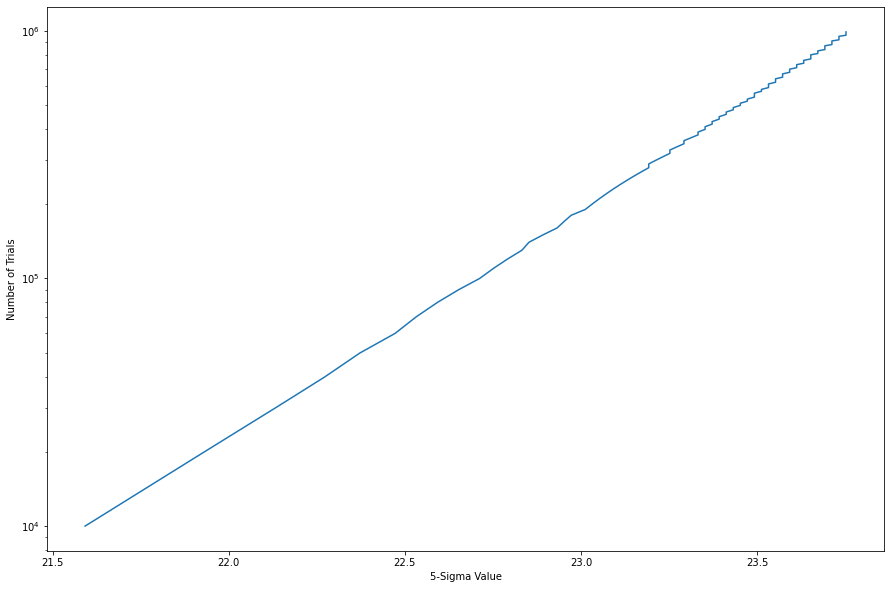

In [27]:
plt.plot(five_sigma,range(10000,1000000,10000))
plt.yscale('log')

plt.xlabel('5-Sigma Value')
plt.ylabel('Number of Trials');

Calculating the 5-sigma value for a range of trials, I show that this is a logarythmic relationship.